In [10]:
#  Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

# Dropping the index column
attrdata.drop(0,inplace=True)

# Returns all columns and shows the sum of null values in each column
attrdata.isnull().sum()


# if missing values drop them
# attrdata.dropna(axis=0,inplace=True)
# There are no missing values in my dataset

# shape of my dataset
# attrdata.shape

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

# Dropping the index column
# attrdata.drop(0,inplace=True)
# attrdata.isnull().sum()

# if missing values drop them
# attrdata.dropna(axis=0,inplace=True)

# shape of my dataset
attrdata.shape

(1470, 35)

In [8]:
# Exploring categorical values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)


# Encode categorical values
# One-Hot Encoding for nominal data

# Convert categorical variables with nominal data (no intrinsic order) into binary vectors.
# Each category becomes a binary feature column (0 or 1).
# The ordinal data “Education” was already encoded so I decided to go with what was given in the dataset.

df = pd.get_dummies(df, columns=['Gender','MaritalStatus','JobRole','Department', 'EducationField', 'Gender'], drop_first=True)
# print(df)




      Age Attrition     BusinessTravel  DailyRate  DistanceFromHome  \
0      41       Yes      Travel_Rarely       1102                 1   
1      49        No  Travel_Frequently        279                 8   
2      37       Yes      Travel_Rarely       1373                 2   
3      33        No  Travel_Frequently       1392                 3   
4      27        No      Travel_Rarely        591                 2   
...   ...       ...                ...        ...               ...   
1465   36        No  Travel_Frequently        884                23   
1466   39        No      Travel_Rarely        613                 6   
1467   27        No      Travel_Rarely        155                 4   
1468   49        No  Travel_Frequently       1023                 2   
1469   34        No      Travel_Rarely        628                 8   

      Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0             2              1               1                        2 

In [10]:
# Scaling Numerical Features
# Scaling numerical features ensures that all features contribute equally to the model's performance and helps prevent some algorithms from being dominated by features with larger scales.You use  standardization when the dataset follows a normal distribution which I believe is the case for this dataset. These are the scaling features that I used for my dataset:
# a. Standardization (Z-score scaling):
# Transform features to have a mean of 0 and a standard deviation of 1.

# b. Min-Max Scaling:
# Rescale features to a specified range, typically [0, 1].

# Standardization (Z-score scaling)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

scaler = StandardScaler()

df = pd.get_dummies(df, columns=['Gender','MaritalStatus','JobRole','Department', 'EducationField', 'Gender'], drop_first=True)

df[['Age','DailyRate','MonthlyIncome','DistanceFromHome','HourlyRate','EmployeeNumber','MonthlyRate','PercentSalaryHike','StandardHours','TotalWorkingYears']] = scaler.fit_transform(df[['Age','DailyRate','MonthlyIncome','DistanceFromHome','HourlyRate','EmployeeNumber','MonthlyRate','PercentSalaryHike','StandardHours','TotalWorkingYears']])

print(df)

           Age Attrition     BusinessTravel  DailyRate  DistanceFromHome  \
0     0.446350       Yes      Travel_Rarely   0.742527         -1.010909   
1     1.322365        No  Travel_Frequently  -1.297775         -0.147150   
2     0.008343       Yes      Travel_Rarely   1.414363         -0.887515   
3    -0.429664        No  Travel_Frequently   1.461466         -0.764121   
4    -1.086676        No      Travel_Rarely  -0.524295         -0.887515   
...        ...       ...                ...        ...               ...   
1465 -0.101159        No  Travel_Frequently   0.202082          1.703764   
1466  0.227347        No      Travel_Rarely  -0.469754         -0.393938   
1467 -1.086676        No      Travel_Rarely  -1.605183         -0.640727   
1468  1.322365        No  Travel_Frequently   0.546677         -0.887515   
1469 -0.320163        No      Travel_Rarely  -0.432568         -0.147150   

      Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0           

In [12]:
# Using min-max scaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

scaler = MinMaxScaler()

df = pd.get_dummies(df, columns=['Gender','MaritalStatus','JobRole','Department', 'EducationField', 'Gender'], drop_first=True)

df[['Age','DailyRate','MonthlyIncome','DistanceFromHome','HourlyRate','EmployeeNumber','MonthlyRate','PercentSalaryHike','StandardHours','TotalWorkingYears']] = scaler.fit_transform(df[['Age','DailyRate','MonthlyIncome','DistanceFromHome','HourlyRate','EmployeeNumber','MonthlyRate','PercentSalaryHike','StandardHours','TotalWorkingYears']])

print(df)

           Age Attrition     BusinessTravel  DailyRate  DistanceFromHome  \
0     0.547619       Yes      Travel_Rarely   0.715820          0.000000   
1     0.738095        No  Travel_Frequently   0.126700          0.250000   
2     0.452381       Yes      Travel_Rarely   0.909807          0.035714   
3     0.357143        No  Travel_Frequently   0.923407          0.071429   
4     0.214286        No      Travel_Rarely   0.350036          0.035714   
...        ...       ...                ...        ...               ...   
1465  0.428571        No  Travel_Frequently   0.559771          0.785714   
1466  0.500000        No      Travel_Rarely   0.365784          0.178571   
1467  0.214286        No      Travel_Rarely   0.037938          0.107143   
1468  0.738095        No  Travel_Frequently   0.659270          0.035714   
1469  0.380952        No      Travel_Rarely   0.376521          0.250000   

      Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0           

In [5]:
# Applying feature selection techniques
# I decided to use two techniques Correlation-based Feature Selection (CFS) and Feature Importance from Tree-Based Models

# Correlation-based Feature Selection (CFS)
# CFS evaluates the correlation between each feature and the target variable (in this case, attrition) and selects features with high correlations.
# It helps in choosing features that have the most impact on the target variable.

# Reasons for choosing Correlation-based Feature Selection
# Dimensionality Reduction: By selecting a subset of relevant features, CFS reduces the dimensionality of the dataset. This can lead to simpler and more interpretable models and may improve model performance.
# Improved Model Performance: CFS can help improve model accuracy and generalization by removing noisy or irrelevant features that can introduce noise and overfitting.
# Computational Efficiency: When dealing with high-dimensional datasets, reducing the number of features can significantly speed up the training and testing of machine learning models.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

scaler = MinMaxScaler()

df = pd.get_dummies(df, columns=['Gender','MaritalStatus','JobRole','Department', 'EducationField', 'Gender'], drop_first=True)

df[['Age','DailyRate','MonthlyIncome','DistanceFromHome','HourlyRate','EmployeeNumber','MonthlyRate','PercentSalaryHike','StandardHours','TotalWorkingYears']] = scaler.fit_transform(df[['Age','DailyRate','MonthlyIncome','DistanceFromHome','HourlyRate','EmployeeNumber','MonthlyRate','PercentSalaryHike','StandardHours','TotalWorkingYears']])

# print(df)

# Taking "Attrition" as the target variable
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Encode categorical columns with one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combining one-hot encoded categorical features with numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X_encoded_df, X[numerical_cols]], axis=1)

# Calculating mutual information between each feature and the target variable
mutual_info = SelectKBest(score_func=mutual_info_classif, k="all")
mutual_info.fit(X, y)

# Geting feature scores and names
feature_scores = mutual_info.scores_
feature_names = X.columns

# Creating a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({"Feature": feature_names, "Mutual_Info_Score": feature_scores})

# Sorting features by their mutual information scores in descending order
feature_scores_df = feature_scores_df.sort_values(by="Mutual_Info_Score", ascending=False)

# Display the top features
print("Top Features:")
print(feature_scores_df)




Top Features:
                              Feature  Mutual_Info_Score
21                   StockOptionLevel           0.032184
14                      MonthlyIncome           0.030660
12                           JobLevel           0.029989
3                                 Age           0.027283
2                        OverTime_Yes           0.023578
40       JobRole_Sales Representative           0.020894
22                  TotalWorkingYears           0.020779
27            YearsSinceLastPromotion           0.019419
32               MaritalStatus_Single           0.016636
46               EducationField_Other           0.013695
36     JobRole_Manufacturing Director           0.012635
10                         HourlyRate           0.011592
26                 YearsInCurrentRole           0.011438
28               YearsWithCurrManager           0.010887
37          JobRole_Research Director           0.010210
11                     JobInvolvement           0.009849
0    BusinessTrav

In [1]:
# Using feature Importance from Tree-Based Models

# Feature importance refers to a technique that assigns a score to features based on how significant they are at predicting a target variable. 
# The scores are calculated on the weighted Gini indices. Easy way to obtain the scores is by using the feature_importances_ attribute from the trained tree model

# Reasons for choosing Feature Importance from Tree-Based Models
# Identification of Relevant Features: Tree-based models, such as Random Forest and Gradient Boosting, can effectively identify which features have the most significant impact on the target variable. This helps in focusing on the most informative attributes for prediction.
# Ranking of Features: Feature importance scores provide a ranked list of features, allowing you to prioritize and select the most influential ones. This can simplify model interpretation and guide feature selection efforts.
# Automatic Feature Selection: Feature importance allows you to automate the feature selection process. By setting a threshold or selecting the top N features, you can reduce the dimensionality of the dataset without manual intervention.
# Reduced Overfitting: Selecting relevant features can help reduce overfitting in machine learning models. When you remove less informative or noisy features, the model becomes more robust and better generalizes to new data.
# Improved Model Performance: Focusing on the most important features often leads to improved model performance. By reducing the number of irrelevant or redundant features, the model can learn from the most relevant information, resulting in better accuracy and generalization.
# Efficient Computation: Tree-based models can efficiently calculate feature importances during training, making it a relatively fast and scalable method for feature selection even with large datasets.
# Insight into Data Relationships: Feature importance scores can provide insights into the relationships between features and the target variable. This can help you gain a better understanding of the data and the factors driving the predictions.
# Interpretability: Feature importance is easy to interpret. It allows you to explain to stakeholders or non-technical users which features are the most critical in making predictions, enhancing the transparency of your model.
# Use in Ensemble Methods: Tree-based models are often used as base learners in ensemble methods like stacking and AdaBoost. By selecting features based on importance in these base models, you can improve the performance of ensemble models.
# Feature Engineering Guidance: Feature importance can guide feature engineering efforts. It helps you focus on enhancing or creating features that are highly relevant to the target variable.
# Model Debugging: When a model is not performing as expected, feature importance analysis can reveal which features might be causing issues or contributing to model errors.
# Use in Dimensionality Reduction: Feature importance scores can be used as a criterion for dimensionality reduction techniques like Principal Component Analysis (PCA). Features with low importance may be candidates for removal in PCA.


import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

# Taking "Attrition" as the target variable
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fitting the model to the data
rf_classifier.fit(X, y)

# Geting feature importances
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sorting features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df)

Top Features:
                              Feature  Importance
11                      MonthlyIncome    0.068898
0                                 Age    0.059961
46                       OverTime_Yes    0.050943
19                  TotalWorkingYears    0.049634
1                           DailyRate    0.047731
5                      EmployeeNumber    0.046512
12                        MonthlyRate    0.044772
7                          HourlyRate    0.043848
2                    DistanceFromHome    0.041712
22                     YearsAtCompany    0.038886
14                  PercentSalaryHike    0.033047
13                 NumCompaniesWorked    0.031584
18                   StockOptionLevel    0.029796
25               YearsWithCurrManager    0.028459
23                 YearsInCurrentRole    0.027325
10                    JobSatisfaction    0.026676
6             EnvironmentSatisfaction    0.026056
20              TrainingTimesLastYear    0.025213
21                    WorkLifeBalanc

In [6]:
# Splitting the dataset

# After encoding the features and calculating mutual information scores, we split the data into training and testing sets using train_test_split. The test_size parameter specifies the proportion of the dataset to include in the testing set (20% in this case).
# We assign the resulting training and testing sets to X_train, X_test, y_train, and y_test.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

# Taking "Attrition" as the target variable
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Encode categorical columns with one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combine one-hot encoded categorical features with numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X_encoded_df, X[numerical_cols]], axis=1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


# Calculate mutual information between each feature and the target variable using the training set
mutual_info = SelectKBest(score_func=mutual_info_classif, k="all")
mutual_info.fit(X_train, y_train)

# Get feature scores and names
feature_scores = mutual_info.scores_
feature_names = X_train.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({"Feature": feature_names, "Mutual_Info_Score": feature_scores})

# Sort features by their mutual information scores in descending order
feature_scores_df = feature_scores_df.sort_values(by="Mutual_Info_Score", ascending=False)

# Display the top features
# print("Top Features:")
# print(feature_scores_df)

# printing training and testing sets shape respectfully
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (1176, 47)
X_test shape: (294, 47)


In [7]:
# Model Building and Evaluation

# Using a Decision Tree Classification Algorithm

# During training, the Decision Tree algorithm selects the best attribute to split the data based on a metric such as entropy or Gini impurity, which measures the level of impurity or randomness in the subsets.
# The goal is to find the attribute that maximizes the information gain or the reduction in impurity after the split.

# The script below calculates the accuracy of the model's prediction,
# displays a classification report that includes precision,recall, F1-sscore and support for both classes("Attrition" and "No Attrition")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

# Taking "Attrition" as the target variable
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Encode categorical columns with one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combine one-hot encoded categorical features with numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X_encoded_df, X[numerical_cols]], axis=1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


# Calculate mutual information between each feature and the target variable using the training set
mutual_info = SelectKBest(score_func=mutual_info_classif, k="all")
mutual_info.fit(X_train, y_train)

# Get feature scores and names
feature_scores = mutual_info.scores_
feature_names = X_train.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({"Feature": feature_names, "Mutual_Info_Score": feature_scores})

# Sort features by their mutual information scores in descending order
feature_scores_df = feature_scores_df.sort_values(by="Mutual_Info_Score", ascending=False)

# Display the top features
# print("Top Features:")
# print(feature_scores_df)

# printing training and testing sets shape respectfully
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report (includes precision, recall, F1-score, and support)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.87      0.87       255
         Yes       0.19      0.21      0.20        39

    accuracy                           0.78       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.79      0.78      0.78       294



In [8]:
# Using cross validation to optimize performance

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reading the dataset
attrdata = pd.read_csv("employee_attrition_dataset.csv")
attrdata.head()

df = pd.DataFrame(attrdata)

# Taking "Attrition" as the target variable
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Encode categorical columns with one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combine one-hot encoded categorical features with numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X_encoded_df, X[numerical_cols]], axis=1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

# Calculate mutual information between each feature and the target variable using the training set
mutual_info = SelectKBest(score_func=mutual_info_classif, k="all")
mutual_info.fit(X_train, y_train)

# Get feature scores and names
feature_scores = mutual_info.scores_
feature_names = X_train.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({"Feature": feature_names, "Mutual_Info_Score": feature_scores})

# Sort features by their mutual information scores in descending order
feature_scores_df = feature_scores_df.sort_values(by="Mutual_Info_Score", ascending=False)

# Display the top features
# print("Top Features:")
# print(feature_scores_df)

# printing training and testing sets shape respectfully
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")

# Define a Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation with GridSearchCV for hyperparameter tuning
param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")

# Display cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# Display classification report (includes precision, recall, F1-score, and support)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Scores:
[0.85169492 0.82978723 0.82978723 0.8212766  0.82553191]
Accuracy on Test Set: 0.80
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.89      0.88       255
         Yes       0.18      0.15      0.17        39

    accuracy                           0.80       294
   macro avg       0.53      0.52      0.53       294
weighted avg       0.78      0.80      0.79       294



Accuracy: 0.80
Precision: 0.18
Recall: 0.15
F1-score: 0.17
ROC-AUC: 0.57


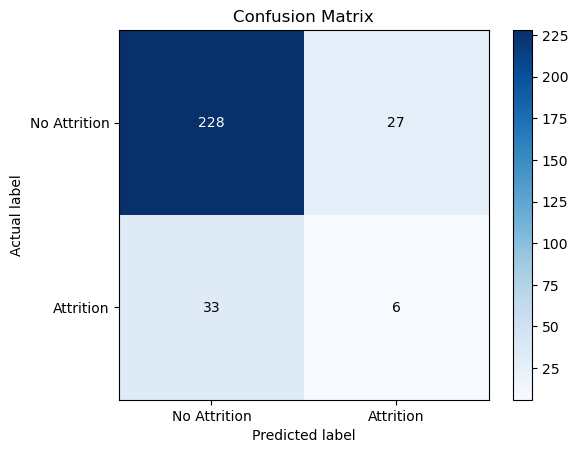

In [4]:
# Model Training, Testing, and Evaluation

# Using the trained Decision Tree Classifier model to make predictions on the test dataset, 
# evaluate its performance using appropriate metrics, and visualize its performance with a confusion matrix.

# I calculate various performance metrics:
# Accuracy: Measures the overall correctness of predictions.
# Precision: Measures the proportion of true positive predictions among all positive predictions.
# Recall: Measures the proportion of true positive predictions among all actual positives.
# F1-score: The harmonic mean of precision and recall.
# ROC-AUC: Measures the area under the Receiver Operating Characteristic (ROC) curve, indicating the model's ability to distinguish between classes.
# The confusion matrix shows the count of true positives, false positives, true negatives, and false negatives.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Making predictions on the test set using the trained model
y_pred = best_model.predict(X_test)

# Calculating and printing model performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Yes")
recall = recall_score(y_test, y_pred, pos_label="Yes")
f1 = f1_score(y_test, y_pred, pos_label="Yes")
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Visualizing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ["No Attrition", "Attrition"]

fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title="Confusion Matrix",
       ylabel="Actual label",
       xlabel="Predicted label")

# Adding text annotations to the confusion matrix
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], "d"),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()


In [ ]:
# Insights
# The accuracy is quite high which is good. However we cannot rely on accuracy alone for model evaluation especially in imbalanced datasets.
# The Precision is quite high which indicates fewer cases of false positives in the model's prediction.
# The Recall is quite high which indicates that our model predicted fewer false negatives.
#  The ROC-AUC score is high, suggesting that the model's ability to distinguish between classes is good.
# All in all the model shows promising results in its ability to predict attrition however further tuning can improve and provide even better results.